# Task 2 : To Explore Supervised Machine Learning 

## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## Importing Necessary Libraries

In [20]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Reading data from source

In [21]:
df=pd.read_csv('http://bit.ly/w-data')
print("Data Imported Successfully")
df.head()

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [22]:
df.shape

(25, 2)

# Visualization

## Plotting Students Scores(Y-Axis) Vs Hours of study(X-Axis)

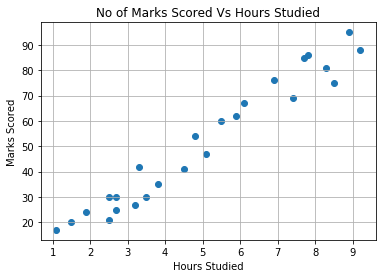

In [23]:
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('No of Marks Scored Vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.grid()
plt.show()

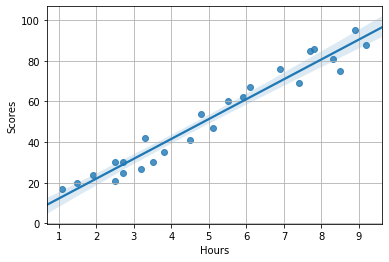

In [24]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.grid()

From the plots above , We Can see that Scores and Hours Studies are in positive Linear Relation

# Preparing The Data

In [25]:
X=df[['Hours']]
y=df['Scores']


## Importing Sklearn

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training The Data on Linear Regression Algorithm

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm=LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

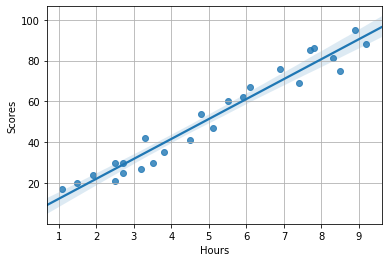

In [31]:
sns.regplot(x='Hours',y='Scores',data=df)
plt.grid()

# Predictions

In [32]:
predict=lm.predict(X_test)
predict

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

## Compairing Actual and Predicted Scores

In [33]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':predict})
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


## Prediction for 9.25 hrs of Study in a Day 

In [34]:
print('The scores of students who studied 9.25 hours a day',lm.predict([[9.25]]))

The scores of students who studied 9.25 hours a day [93.69173249]


In [35]:
print(lm.score(X_test,y_test))
print(lm.score(X_train,y_train))

0.9454906892105356
0.9515510725211553


# Model Evaluation

In [36]:
from sklearn import metrics
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,predict))

Mean Absolute Error :  4.183859899002975


In [37]:
print('Mean Squared Error :',metrics.mean_squared_error(y_test,predict))

Mean Squared Error : 21.5987693072174


# Pickling 

In [38]:
import pickle

In [40]:
pickle_out=open('classifier.pkl','wb')
pickle.dump(lm,pickle_out)
pickle_out.close()